In [1]:
import json

##### download the dataset by turning this into code cell
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json


In [2]:
!ls ../datasets/sarcasm_sentiment_analysis/

sarcasm.json


In [3]:
with open('../datasets/sarcasm_sentiment_analysis/sarcasm.json', 'r') as f:
    datastore = json.load(f)

In [4]:
sentences = []
labels = []
urls = []

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

##### load into python lists during iterations 

In [6]:
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

now we have three lists labels, text and urls

#### tokenize and turn into padded sequences 

**note:** training sentences must only see training portion of the dataset

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token = "<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequence = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequence, padding='post',
                               maxlen=max_length, truncating=trunc_type)
print(training_padded[0])
print(training_padded.shape)

[ 328    1  799 3405 2404   47  389 2214    1    6 2614 8863    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
(20000, 100)


In [9]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                              padding=padding_type, truncating=trunc_type)

#### embeddings help us understand the meaning of the word, sentence 

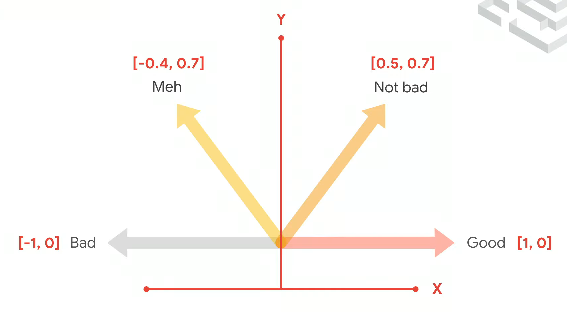

good and bad -> sarcastic or non-sarcastic<br>
a word or a group of word will have direction and give us idea of the sentiment

### define model 

In [10]:
import tensorflow as tf

for tensorflow 2 we need the below block

In [11]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## train the network 

In [14]:
num_epochs = 30

In [15]:
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                   validation_data=(testing_padded, testing_labels),
                   verbose=2)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t

#### CLASSIFYING NEW SENTENCES 

In [16]:
sentence = [
    'granny starting to fear spiders in the garden might be real',
    'the weather today is bright and sunny'
]

In [17]:
sequences = tokenizer.texts_to_sequences(sentence)

In [18]:
padded = pad_sequences(sequences, maxlen=max_length,
                      padding=padding_type, truncating=trunc_type)

In [19]:
print(model.predict(padded))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[9.8915380e-01]
 [2.8117196e-04]]


#### The first sentence has higher probability of being a sarcastic statement then the second sentence 

the order in which the words appear in the sentece does not really matter, what determined the sentiment was that the vector resulted in adding all the individual vectors for the individual words .....